# Task A2

### 1. Let’s do some further investigation by combining the data for all the states and territories in Australia. Read the data for the rest of the states and merge them in a single dataframe. (Hint: you can use a combination of merge, melt or concat operators to get your data in a format suitable for answering the following questions)

#### Importing the required libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Making the dataframe using concat

In [43]:
df1=pd.read_excel('energy_data.xlsx','VIC')
df2=df=pd.read_excel('energy_data.xlsx','TAS')
df3=df=pd.read_excel('energy_data.xlsx','QLD')
df4=df=pd.read_excel('energy_data.xlsx','SA')
df5=df=pd.read_excel('energy_data.xlsx','WA')
df6=df=pd.read_excel('energy_data.xlsx','NT')
df7=df=pd.read_excel('energy_data.xlsx','NSW')
df=pd.concat([df1,df2,df3,df4,df5,df6,df7],ignore_index=True)
df.replace(np.NaN,0,inplace=True)

### 1.a) Plot a column chart showing the total energy generated in Australia by fuel type in the year 2018.

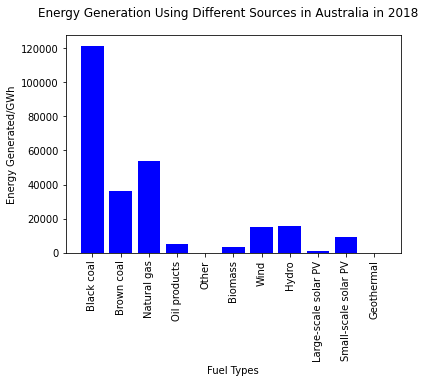

In [69]:
Fuel_Type=df1['Fuel_Type']
FuelUse2018=np.arange(0,11,1)
for i in range(11):
    df_temp=df[df['Fuel_Type']==Fuel_Type[i]]
    FuelUse2018[i]=df_temp[2018].sum()
plt.bar(Fuel_Type,FuelUse2018,color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('Fuel Types')
plt.ylabel('Energy Generated/GWh')
plt.suptitle('Energy Generation Using Different Sources in Australia in 2018')
plt.savefig('A2, task 1a')
del df_temp

### 1.b. Which state had the highest energy production in 2018? What is the ratio (percentage breakdown) of renewable vs non-renewable energy production for that state in 2018.

In [71]:
states=np.array(['VIC','TAS','QLD','SA','NT','NSW','WA'],dtype='object')
TotalEnergy=np.arange(0,7,1)
for i in range(7):
    df_tmp=df[df['State']==states[i]]
    TotalEnergy[i]=df_tmp[2018].sum()
highest=0
for i in range(7):
    if TotalEnergy[i]>highest:
        highest=TotalEnergy[i]
        highest_state=states[i]
print('The State with the highest energy generation:',highest_state)
df_tmp=df[df['State']==highest_state]
df_Renewable=df_tmp[df_tmp['Category']=='Renewable fuels']
df_NonRenewable=df_tmp[df_tmp['Category']=='Non-renewable fuels']
print("Percentage of Energy Generation using Renewable Energy", (df_Renewable[2018].sum()/df_tmp[2018].sum())*100)
print("Percentage of Energy Generation using Non-Renewable Energy", (df_NonRenewable[2018].sum()/df_tmp[2018].sum())*100)
del df_tmp

The State with the highest energy generation: NSW
Percentage of Energy Generation using Renewable Energy 15.660311717227943
Percentage of Energy Generation using Non-Renewable Energy 84.33968828277204


### 1c. Draw a plot showing the percentage of energy generation from renewable energy sources for each state over the period 2009 to 2018. From your graph, which state do you think is making the most progress towards adopting green energy? Provide a reason for your answer.

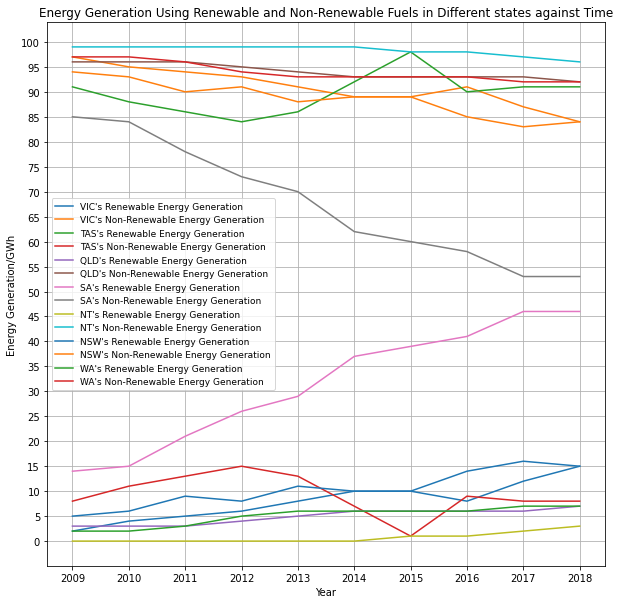

In [97]:
fig, ax=plt.subplots(figsize=(10,10))
states=np.array(['VIC','TAS','QLD','SA','NT','NSW','WA'],dtype='object')
dfRenewable=df[df['Category']=='Renewable fuels']
dfNonRenewable=df[df['Category']=='Non-renewable fuels']
for state in states:
    df_states=df[df['State']==state]
    df_states_r=dfRenewable[dfRenewable['State']==state]
    df_states_rn=dfNonRenewable[dfNonRenewable['State']==state]
    Overall_RenewableEnergy=np.arange(0,10,1)
    Overall_NonRenewableEnergy=np.arange(0,10,1)
    STARTING_YEAR=2009
    for year in range(2009,2019):
        Overall_RenewableEnergy[year-STARTING_YEAR]=(df_states_r[year].sum()/df_states[year].sum())*100
        Overall_NonRenewableEnergy[year-STARTING_YEAR]=(df_states_rn[year].sum()/df_states[year].sum())*100
    year=np.arange(2009,2019,1)
    ax.plot(year,Overall_RenewableEnergy,label=state+'\'s Renewable Energy Generation')
    ax.plot(year,Overall_NonRenewableEnergy,label=state+'\'s Non-Renewable Energy Generation')
ax.set_xticks(year)
ax.set_yticks(np.arange(0,105,5))
ax.set_xlabel('Year')
ax.set_ylabel('Energy Generation/GWh')
ax.set_title('Energy Generation Using Renewable and Non-Renewable Fuels in Different states against Time')
ax.grid()
plt.legend(prop={'size':9}) #prop={'size':9} is for font size, prop means property
plt.savefig('A2, task 1c')